# Post-Processing (General)

#### Updated: May 15, 2023

#  

Post-processing pipeline after subdirectories are OCR processed:

In [55]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
rootDir = 'L:/DATA/Alouette_I/BATCH_II_Run2/'
processedDir = rootDir + '04_processed/'
resultDir = rootDir + '05_result/'
logDir = rootDir + '06_log/'

#  

#### Generate processed_inventory - RUN BEFORE starting OCR process step:

In [3]:
df_inventory = pd.DataFrame()
for directory in os.listdir(processedDir):
    print(directory)
    for subdirectory in os.listdir(processedDir + directory):
        n_images = len(os.listdir(processedDir + directory + '/' + subdirectory))
        df_inventory_ = pd.DataFrame({
            'Directory': directory, 
            'Subdirectory': subdirectory,
            'images': n_images,
            'subdir_id': directory + '_' + subdirectory
        }, index=[0])
        df_inventory = pd.concat([df_inventory, df_inventory_], axis=0, ignore_index=True)

R014207711
R014207807
R014207808
R014207810
R014207811
R014207813
R014207817
R014207818
R014207819
R014207820
R014207822
R014207825
R014207826
R014207827
R014207828
R014207829
R014207830
R014207831
R014207833
R014207834
R014207835
R014207836
R014207837
R014207838
R014207839
R014207843
R014207886
R014207892
R014207941
R014207944
R014207945
R014207950
R014207952
R014207961
R014207963
R014207969
R028224481


In [4]:
print(len(df_inventory))
df_inventory.head()

1977


,Directory,Subdirectory,images,subdir_id
0,R014207711,24,256,R014207711_24
1,R014207711,25,499,R014207711_25
2,R014207711,27,96,R014207711_27
3,R014207711,28,103,R014207711_28
4,R014207711,29,341,R014207711_29


In [5]:
df_inventory.to_csv(logDir + 'image_inventory_processed.csv', index=False)

#  

#### Concatenate 'OCR pass' results:

In [279]:
df_result = pd.DataFrame()
i = 0
for file in os.listdir(resultDir):
    if 'R' in file:
        directory = file
        for file2 in os.listdir(resultDir + directory + '/'):
            if 'result_OCRpass' in file2:
                fn_parts = file2.split('_')
                subdirectory = fn_parts[2].replace('.csv', '')
                if i > 0:
                    if i % 100 == 0:
                        df_result = pd.read_csv(resultDir + 'result_total.csv')
                        print(len(df_result))
                try:
                    df_load = pd.read_csv(resultDir + directory + '/' + file2, sep=',')
                    n = len(df_load)
                except pd.errors.EmptyDataError:
                    n = 0
                df_result = pd.concat([df_result, df_load])
                i += 1
                if i % 100 == 0:
                    print('Now saving the ' + str(i) + 'th result...')
                    df_result.to_csv(resultDir + 'result_total.csv', index=False)
df_result.to_csv(resultDir + 'result_total.csv', index=False)

#  

#### Reduce columns:

In [280]:
df_result = pd.read_csv(resultDir + 'result_total.csv')
print(len(df_result))
df_result.head()

4324


,fmin,max_depth,day_1,day_2,day_3,hour_1,hour_2,minute_1,minute_2,second_1,...,details,Directory,Subdirectory,filename,station_number_OCR,year_OCR,day_of_year_OCR,hour_OCR,minute_OCR,second_OCR
0,1.516129,1038.271605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,metadata was interpreted to be dot type,R014207711,39,168.png,NaN,NaN,NaN,NaN,NaN,NaN
1,5.462963,1069.135802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,metadata was interpreted to be dot type,R014207711,39,77.png,NaN,NaN,NaN,NaN,NaN,NaN
2,10.075269,60.493827,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,R014207711,39,125.png,NaN,NaN,NaN,NaN,NaN,NaN
3,2.016129,420.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,R014207711,39,176.png,NaN,NaN,NaN,NaN,NaN,NaN
4,1.516129,1038.271605,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,R014207711,39,193.png,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
df_result['year_1'] = df_result['year']
df_result = df_result[['Directory', 'Subdirectory', 'filename', 'processed_image_class', 'fmin', 'max_depth', 
                       'station_number_1', 'station_number_2', 'year_1', 'day_1', 'day_2', 'day_3', 'hour_1', 'hour_2', 
                       'minute_1', 'minute_2', 'second_1', 'second_2', 'satellite_number', 'station_number_OCR', 
                       'year_OCR', 'day_of_year_OCR', 'hour_OCR', 'minute_OCR', 'second_OCR', 'metadata_type', 'is_dot', 
                       'func_name', 'details']] 
df_result.sample(10)

,Directory,Subdirectory,filename,processed_image_class,fmin,max_depth,station_number_1,station_number_2,year_1,day_1,...,station_number_OCR,year_OCR,day_of_year_OCR,hour_OCR,minute_OCR,second_OCR,metadata_type,is_dot,func_name,details
2298,R014207835,4065-19A,135.png,num2,1.533333,1221.276596,NaN,NaN,NaN,NaN,...,19.0,61.0,118.0,20.0,5.0,37.0,NaN,NaN,NaN,NaN
2656,R014207886,2,76.png,outlier,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image_segmentation.segment_images_in_subdir.se...,"left_height: 100,width: 40"
4092,R014207969,1294-5A,82.png,loss,1.705645,2266.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metadata was interpreted to be dot type
2815,R014207941,1804-3A,118.png,num,1.677419,1434.615385,0.0,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,R014207808,4612-50,220.png,num2,1.500000,1306.000000,NaN,NaN,NaN,NaN,...,50.0,68.0,294.0,14,02,50,NaN,NaN,NaN,NaN
2717,R014207892,113,58.png,outlier,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image_segmentation.segment_images_in_subdir.se...,"height: 695,width: 451"
1150,R014207820,3000-43A,224.png,loss,1.524194,1235.416667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metadata could not be read by OCR
2041,R014207835,4060-19,194.png,num2,1.516129,1221.276596,NaN,NaN,NaN,NaN,...,19.0,67.0,083,00,09,2.0,NaN,NaN,NaN,NaN
1034,R014207820,3000-43A,115.png,loss,1.673387,1345.833333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metadata could not be read by OCR
1517,R014207822,3461-19A-2,299.png,loss,1.500000,1042.187500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metadata could not be read by OCR


#  

#### Split results into different metadata types (dot, num, num2):

In [282]:
df_result['processed_image_class'].unique()

array(['loss', 'num', 'outlier', 'num2'], dtype=object)

In [283]:
df_num2 = df_result.loc[df_result['processed_image_class'] == 'num2']
print(len(df_num2))

659


In [284]:
df_num = df_result.loc[df_result['processed_image_class'] == 'num']
print(len(df_num))

1329


In [285]:
df_dot = df_result.loc[df_result['processed_image_class'] == 'dot']
print(len(df_dot))

0


In [286]:
df_outlier = df_result.loc[df_result['processed_image_class'] == 'outlier']
print(len(df_outlier))

515


In [287]:
df_loss = df_result.loc[df_result['processed_image_class'] == 'loss']
print(len(df_loss))

1821


In [288]:
len(df_num2) + len(df_num) + len(df_dot) + len(df_outlier) + len(df_loss)

4324

#### num2 - check timestamp components, construct timestamp:

In [289]:
df_num2[['year_OCR', 'day_of_year_OCR', 'hour_OCR', 'minute_OCR', 'second_OCR']].sample(10)

,year_OCR,day_of_year_OCR,hour_OCR,minute_OCR,second_OCR
2168,67.0,083,09,16,25.0
864,68.0,294.0,14,01,58
2312,67.0,118.0,20.0,9.0,23.0
2012,67.0,082,01,21,28.0
2400,67.0,117.0,19.0,33.0,43.0
1949,61.0,078,09,36,9.0
946,68.0,292.0,14,31,37
2008,67.0,082,01,20,19.0
2116,67.0,083,01,25,7.0
2414,67.0,124.0,16.0,46.0,53.0


year:

<Axes: xlabel='year_OCR', ylabel='Count'>

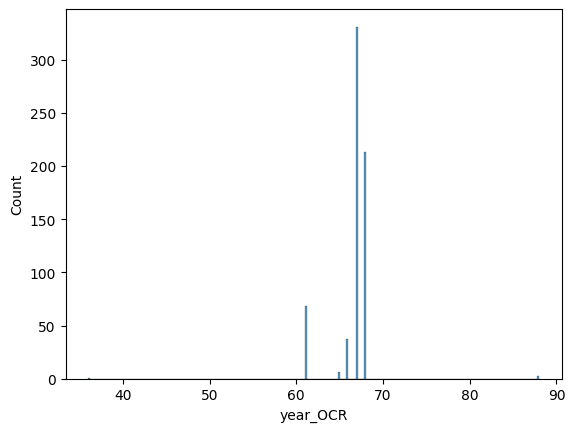

In [290]:
df_num2 = df_num2.copy(deep=True)
df_num2['year_OCR'] = df_num2['year_OCR'].astype('float')
sns.histplot(data=df_num2, x='year_OCR')

In [291]:
df_num2['year_OCR'] = df_num2['year_OCR'].apply(lambda x: np.nan if x<62 else x)
df_num2['year_OCR'] = df_num2['year_OCR'].apply(lambda x: np.nan if x>80 else x)

In [292]:
df_num2['year'] = df_num2['year_OCR'] + 1900
df_num2[['year', 'year_OCR']].sample(10)

,year,year_OCR
877,1968.0,68.0
256,1968.0,68.0
1651,1966.0,66.0
1622,1966.0,66.0
855,1968.0,68.0
1897,1966.0,66.0
2420,1967.0,67.0
279,1968.0,68.0
791,1968.0,68.0
2094,1967.0,67.0


day:

<Axes: xlabel='day_of_year_OCR', ylabel='Count'>

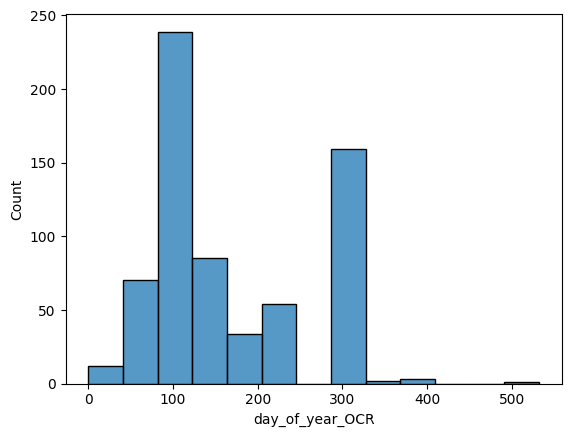

In [293]:
df_num2['day_of_year_OCR'] = df_num2['day_of_year_OCR'].astype('float')
sns.histplot(data=df_num2, x='day_of_year_OCR')

In [294]:
df_num2['day_of_year_OCR'] = df_num2['day_of_year_OCR'].apply(lambda x: np.nan if x>366 else x)
df_num2['day_of_year_OCR'] = df_num2['day_of_year_OCR'].apply(lambda x: np.nan if x==0 else x)
df_num2['day_of_year'] = df_num2['day_of_year_OCR']
df_num2[['day_of_year', 'day_of_year_OCR']].sample(10)

,day_of_year,day_of_year_OCR
2536,118.0,118.0
257,201.0,201.0
870,294.0,294.0
2416,124.0,124.0
2009,82.0,82.0
236,201.0,201.0
884,290.0,290.0
817,294.0,294.0
934,292.0,292.0
2287,118.0,118.0


hour:

<Axes: xlabel='hour_OCR', ylabel='Count'>

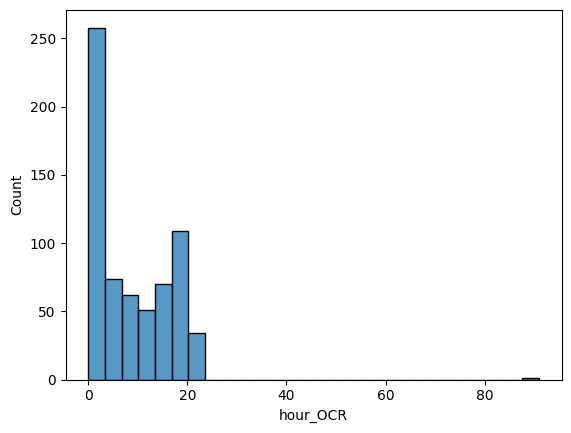

In [295]:
df_num2['hour_OCR'] = df_num2['hour_OCR'].astype('float')
sns.histplot(data=df_num2, x='hour_OCR')

In [296]:
df_num2['hour_OCR'] = df_num2['hour_OCR'].apply(lambda x: np.nan if x>24 else x)
df_num2['hour'] = df_num2['hour_OCR']
df_num2[['hour', 'hour_OCR']].sample(10)

,hour,hour_OCR
2450,18.0,18.0
2516,19.0,19.0
195,8.0,8.0
863,14.0,14.0
886,13.0,13.0
307,4.0,4.0
557,16.0,16.0
844,0.0,0.0
2493,21.0,21.0
1949,9.0,9.0


minute:

<Axes: xlabel='minute_OCR', ylabel='Count'>

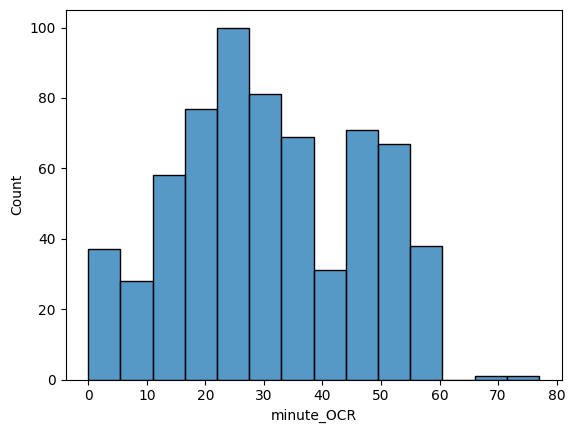

In [297]:
df_num2['minute_OCR'] = df_num2['minute_OCR'].astype('float')
sns.histplot(data=df_num2, x='minute_OCR')

In [298]:
df_num2['minute_OCR'] = df_num2['minute_OCR'].apply(lambda x: np.nan if x>60 else x)
df_num2['minute'] = df_num2['minute_OCR']
df_num2[['minute', 'minute_OCR']].sample(10)

,minute,minute_OCR
2300,6.0,6.0
2538,29.0,29.0
919,54.0,54.0
1986,15.0,15.0
283,29.0,29.0
2425,49.0,49.0
2459,36.0,36.0
2231,34.0,34.0
782,17.0,17.0
2333,38.0,38.0


second:

<Axes: xlabel='second_OCR', ylabel='Count'>

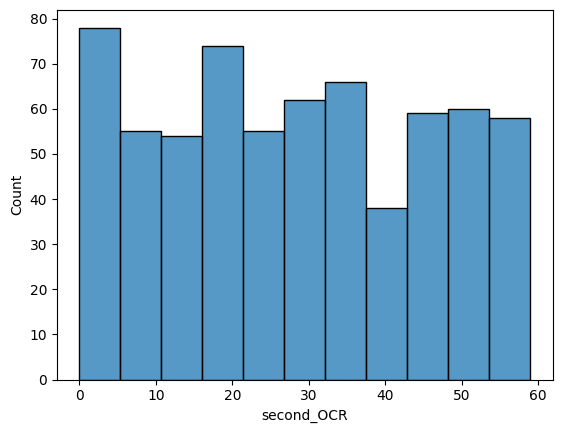

In [299]:
df_num2['second_OCR'] = df_num2['second_OCR'].astype('float')
sns.histplot(data=df_num2, x='second_OCR')

In [300]:
df_num2['second_OCR'] = df_num2['second_OCR'].apply(lambda x: np.nan if x>60 else x)
df_num2['second'] = df_num2['second_OCR']
df_num2[['second', 'second_OCR']].sample(10)

,second,second_OCR
2286,30.0,30.0
644,38.0,38.0
258,33.0,33.0
293,3.0,3.0
2489,13.0,13.0
796,12.0,12.0
2354,8.0,8.0
2300,11.0,11.0
2002,53.0,53.0
2389,25.0,25.0


construct timestamp:

In [301]:
df_num2['month_day'] = pd.to_datetime(df_num2['day_of_year'], format='%j').dt.strftime('%m-%d')
df_num2['month'] = df_num2['month_day'].str.split('-').str[0]
df_num2['day'] = df_num2['month_day'].str.split('-').str[1]
df_num2['Timestamp'] = pd.to_datetime(df_num2[['year', 'month', 'day', 'hour', 'minute', 'second']], format='%Y-%m-%d %H:%M:%S')
df_num2[['year', 'month', 'day', 'hour', 'minute', 'second', 'Timestamp']].sample(10)

,year,month,day,hour,minute,second,Timestamp
2118,1967.0,03,24,7.0,25.0,41.0,1967-03-24 07:25:41
1622,1966.0,NaN,NaN,22.0,28.0,8.0,NaT
1972,1967.0,03,19,0.0,35.0,10.0,1967-03-19 00:35:10
2461,1967.0,05,04,18.0,37.0,6.0,1967-05-04 18:37:06
2179,NaN,03,19,0.0,32.0,36.0,NaT
776,1968.0,10,18,13.0,53.0,37.0,1968-10-18 13:53:37
1984,1967.0,01,19,1.0,15.0,0.0,1967-01-19 01:15:00
2315,NaN,04,28,20.0,9.0,57.0,NaT
2484,1967.0,04,27,19.0,28.0,12.0,1967-04-27 19:28:12
909,1966.0,10,19,0.0,52.0,20.0,1966-10-19 00:52:20


#    

#### num - check timestamp components, construct timestamp:

In [302]:
df_num[['year_1', 'day_1', 'day_2', 'day_3', 'hour_1', 'hour_2', 'minute_1', 'minute_2', 'second_1', 'second_2']].sample(10)

,year_1,day_1,day_2,day_3,hour_1,hour_2,minute_1,minute_2,second_1,second_2
2976,4.0,2.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,9.0
4208,3.0,3.0,0.0,4.0,0.0,1.0,4.0,3.0,2.0,6.0
2846,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2949,4.0,2.0,1.0,5.0,0.0,9.0,4.0,7.0,0.0,9.0
4203,3.0,3.0,0.0,4.0,0.0,1.0,4.0,1.0,4.0,0.0
3654,1.0,4.0,0.0,8.0,4.0,2.0,3.0,1.0,9.0,2.0
2667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3366,4.0,0.0,5.0,1.0,2.0,3.0,4.0,0.0,2.0,6.0
3383,4.0,0.0,5.0,1.0,2.0,3.0,4.0,5.0,2.0,9.0
3004,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


year - adjust to baseline 1962:

<Axes: xlabel='year', ylabel='Count'>

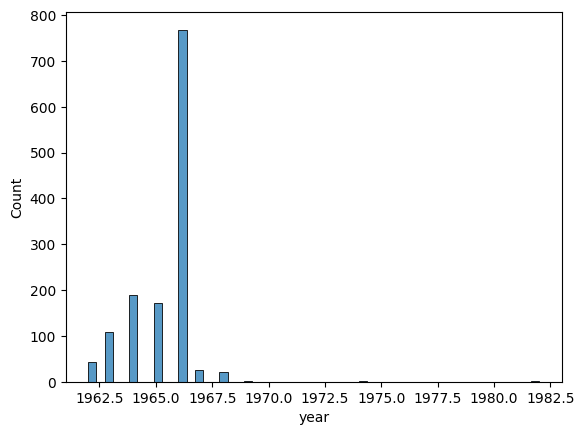

In [303]:
df_num = df_num.copy(deep=True)
df_num['year'] = df_num['year_1'] + 1962
df_num['year'] = df_num['year'].astype('float')
sns.histplot(data=df_num, x='year')

In [304]:
df_num['year'] = df_num['year'].apply(lambda x: np.nan if x<1962 else x)
df_num['year'] = df_num['year'].apply(lambda x: np.nan if x>1980 else x)
df_num[['year', 'year_1']].sample(10)

,year,year_1
2977,1966.0,4.0
3598,1966.0,4.0
3591,1966.0,4.0
2889,1963.0,1.0
3238,1964.0,2.0
3739,1966.0,4.0
2927,1966.0,4.0
3070,1964.0,2.0
4297,1967.0,5.0
3021,1966.0,4.0


day:

<Axes: xlabel='day_1', ylabel='Count'>

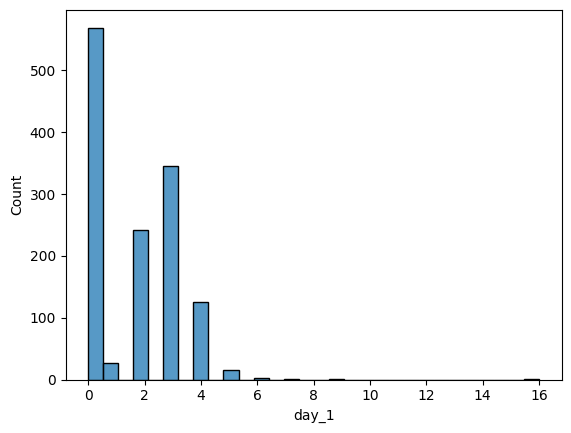

In [305]:
df_num['day_1'] = df_num['day_1'].astype(int)
sns.histplot(data=df_num, x='day_1')

In [306]:
df_num['day_1'] = df_num['day_1'].apply(lambda x: np.nan if x>9 else x)

<Axes: xlabel='day_2', ylabel='Count'>

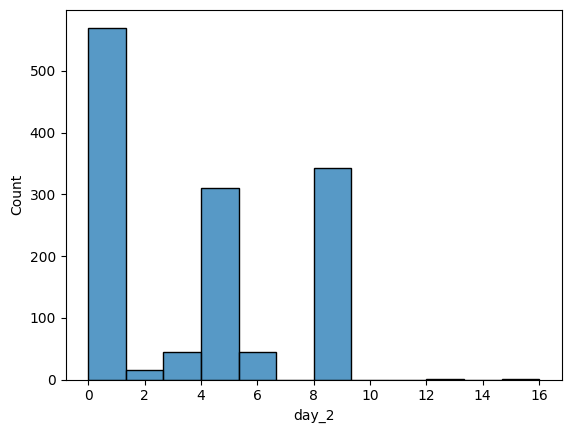

In [307]:
df_num['day_2'] = df_num['day_2'].astype(int)
sns.histplot(data=df_num, x='day_2')

In [308]:
df_num['day_2'] = df_num['day_2'].apply(lambda x: np.nan if x>9 else x)

<Axes: xlabel='day_3', ylabel='Count'>

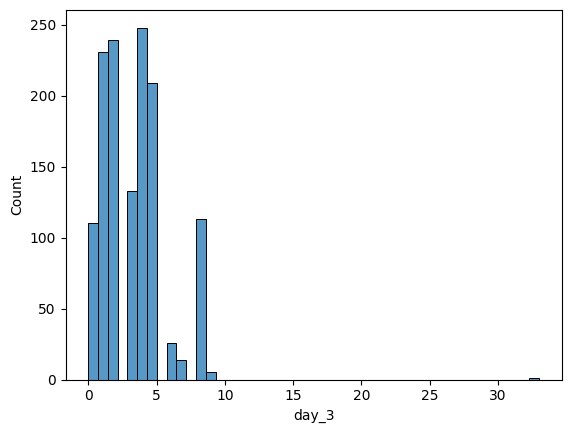

In [309]:
df_num['day_3'] = df_num['day_3'].astype(int)
sns.histplot(data=df_num, x='day_3')

In [310]:
df_num['day_3'] = df_num['day_3'].apply(lambda x: np.nan if x>9 else x)

In [311]:
df_num_daycheck = df_num[~pd.isna(df_num['day_1'])]
df_num_daycheck = df_num_daycheck[~pd.isna(df_num_daycheck['day_2'])]
df_num_daycheck = df_num_daycheck[~pd.isna(df_num_daycheck['day_3'])]
df_num_daycheck['day_of_year'] = df_num_daycheck['day_1'].astype(int).astype(str) + df_num_daycheck['day_2'].astype(int).astype(str) + df_num_daycheck['day_3'].astype(int).astype(str)
df_num_daycheck['day_of_year'] = df_num_daycheck['day_of_year'].astype(int)
df_num_daycheck['day_of_year'] = df_num_daycheck['day_of_year'].apply(lambda x: np.nan if x>366 else x)
df_num_daycheck['day_of_year'] = df_num_daycheck['day_of_year'].apply(lambda x: np.nan if x==0 else x)
df_num_nullday = df_num.loc[pd.isna(df_num['day_1']) | pd.isna(df_num['day_2']) | pd.isna(df_num['day_3'])]
df_num_nullday = df_num_nullday.copy(deep=True)
df_num_nullday['day_of_year'] = np.nan
df_num = pd.concat([df_num_daycheck, df_num_nullday])
print(len(df_num))
df_num[['day_of_year', 'day_1', 'day_2', 'day_3']].sample(10)

1329


,day_of_year,day_1,day_2,day_3
3101,NaN,3.0,9.0,0.0
3835,NaN,4.0,0.0,8.0
3584,51.0,0.0,5.0,1.0
3151,361.0,3.0,6.0,1.0
5,NaN,0.0,0.0,0.0
3574,NaN,5.0,1.0,0.0
3366,51.0,0.0,5.0,1.0
4140,303.0,3.0,0.0,3.0
4232,304.0,3.0,0.0,4.0
2830,214.0,2.0,1.0,4.0


hour:

<Axes: xlabel='hour_1', ylabel='Count'>

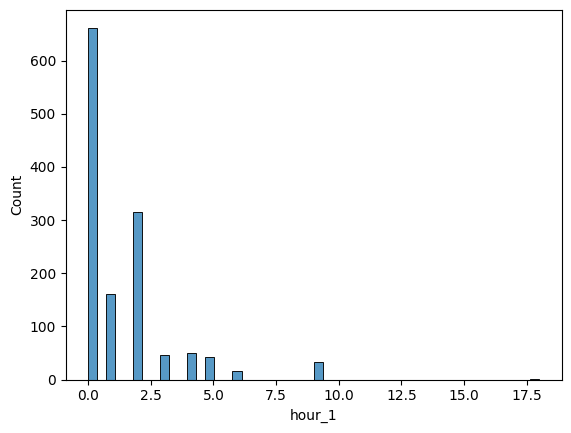

In [312]:
df_num['hour_1'] = df_num['hour_1'].astype(int)
sns.histplot(data=df_num, x='hour_1')

In [313]:
df_num['hour_1'] = df_num['hour_1'].apply(lambda x: np.nan if x>9 else x)

<Axes: xlabel='hour_2', ylabel='Count'>

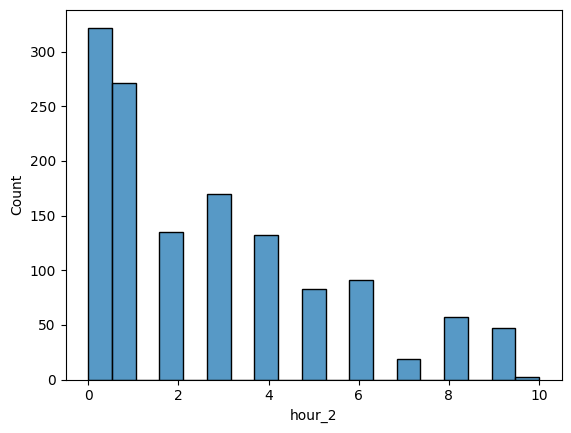

In [314]:
df_num['hour_2'] = df_num['hour_2'].astype(int)
sns.histplot(data=df_num, x='hour_2')

In [315]:
df_num['hour_2'] = df_num['hour_2'].apply(lambda x: np.nan if x>9 else x)

In [316]:
df_num_hourcheck = df_num[~pd.isna(df_num['hour_1'])]
df_num_hourcheck = df_num_hourcheck[~pd.isna(df_num_hourcheck['hour_2'])]
df_num_hourcheck['hour'] = df_num_hourcheck['hour_1'].astype(int).astype(str) + df_num_hourcheck['hour_2'].astype(int).astype(str)
df_num_hourcheck['hour'] = df_num_hourcheck['hour'].astype(int)
df_num_hourcheck['hour'] = df_num_hourcheck['hour'].apply(lambda x: np.nan if x>23 else x)
df_num_nullhour = df_num.loc[pd.isna(df_num['hour_1']) | pd.isna(df_num['hour_2'])]
df_num_nullhour = df_num_nullhour.copy(deep=True)
df_num_nullhour['hour'] = np.nan
df_num = pd.concat([df_num_hourcheck, df_num_nullhour])
print(len(df_num))
df_num[['hour', 'hour_1', 'hour_2']].sample(10)

1329


,hour,hour_1,hour_2
2980,1.0,0.0,1.0
3332,21.0,2.0,1.0
9,0.0,0.0,0.0
3378,23.0,2.0,3.0
3002,10.0,1.0,0.0
4302,16.0,1.0,6.0
3265,10.0,1.0,0.0
2921,0.0,0.0,0.0
3547,2.0,0.0,2.0
4144,20.0,2.0,0.0


minute:

<Axes: xlabel='minute_1', ylabel='Count'>

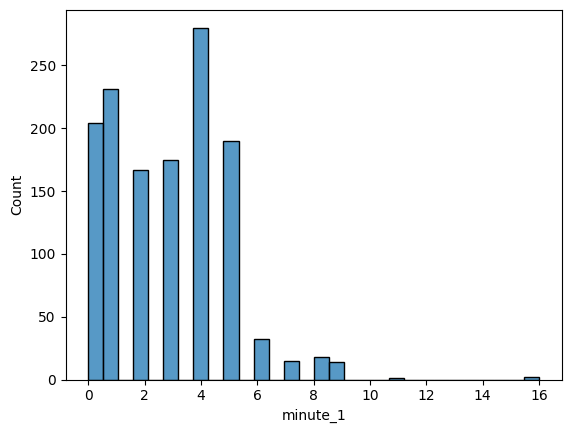

In [317]:
df_num['minute_1'] = df_num['minute_1'].astype(int)
sns.histplot(data=df_num, x='minute_1')

In [318]:
df_num['minute_1'] = df_num['minute_1'].apply(lambda x: np.nan if x>9 else x)

<Axes: xlabel='minute_2', ylabel='Count'>

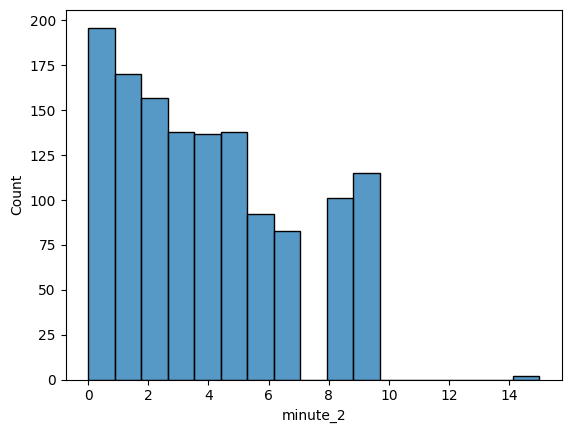

In [319]:
df_num['minute_2'] = df_num['minute_2'].astype(int)
sns.histplot(data=df_num, x='minute_2')

In [320]:
df_num['minute_2'] = df_num['minute_2'].apply(lambda x: np.nan if x>9 else x)

In [321]:
df_num_mincheck = df_num[~pd.isna(df_num['minute_1'])]
df_num_mincheck = df_num_mincheck[~pd.isna(df_num_mincheck['minute_2'])]
df_num_mincheck['minute'] = df_num_mincheck['minute_1'].astype(int).astype(str) + df_num_mincheck['minute_2'].astype(int).astype(str)
df_num_mincheck['minute'] = df_num_mincheck['minute'].astype(int)
df_num_mincheck['minute'] = df_num_mincheck['minute'].apply(lambda x: np.nan if x>59 else x)
df_num_nullmin = df_num.loc[pd.isna(df_num['minute_1']) | pd.isna(df_num['minute_2'])]
df_num_nullmin = df_num_nullmin.copy(deep=True)
df_num_nullmin['minute'] = np.nan
df_num = pd.concat([df_num_mincheck, df_num_nullmin])
print(len(df_num))
df_num[['minute', 'minute_1', 'minute_2']].sample(10)

1329


,minute,minute_1,minute_2
2938,18.0,1.0,8.0
3133,23.0,2.0,3.0
3432,19.0,1.0,9.0
2836,8.0,0.0,8.0
2846,10.0,1.0,0.0
3723,32.0,3.0,2.0
26,1.0,0.0,1.0
3101,52.0,5.0,2.0
3887,34.0,3.0,4.0
3912,53.0,5.0,3.0


second:

<Axes: xlabel='second_1', ylabel='Count'>

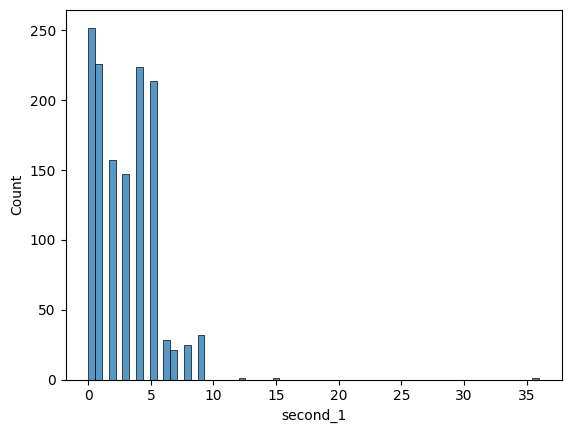

In [322]:
df_num['second_1'] = df_num['second_1'].astype(int)
sns.histplot(data=df_num, x='second_1')

In [323]:
df_num['second_1'] = df_num['second_1'].apply(lambda x: np.nan if x>9 else x)

<Axes: xlabel='second_2', ylabel='Count'>

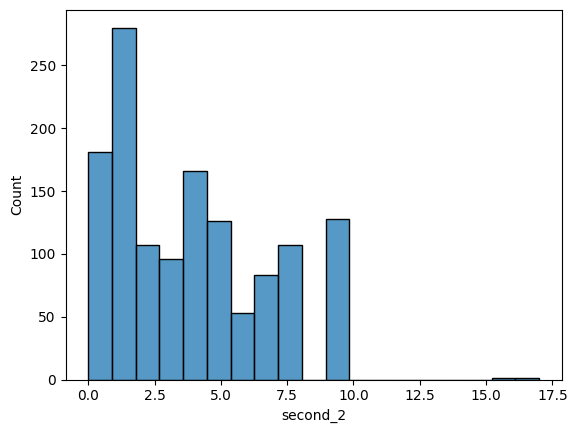

In [324]:
df_num['second_2'] = df_num['second_2'].astype(int)
sns.histplot(data=df_num, x='second_2')

In [325]:
df_num['second_2'] = df_num['second_2'].apply(lambda x: np.nan if x>9 else x)

In [326]:
df_num_seccheck = df_num[~pd.isna(df_num['second_1'])]
df_num_seccheck = df_num_seccheck[~pd.isna(df_num_seccheck['second_2'])]
df_num_seccheck['second'] = df_num_seccheck['second_1'].astype(int).astype(str) + df_num_seccheck['second_2'].astype(int).astype(str)
df_num_seccheck['second'] = df_num_seccheck['second'].astype(int)
df_num_seccheck['second'] = df_num_seccheck['second'].apply(lambda x: np.nan if x>59 else x)
df_num_nullsec = df_num.loc[pd.isna(df_num['second_1']) | pd.isna(df_num['second_2'])]
df_num_nullsec = df_num_nullsec.copy(deep=True)
df_num_nullsec['second'] = np.nan
df_num = pd.concat([df_num_seccheck, df_num_nullsec])
print(len(df_num))
df_num[['second', 'second_1', 'second_2']].sample(10)

1329


,second,second_1,second_2
3349,9.0,0.0,9.0
13,12.0,1.0,2.0
4263,10.0,1.0,0.0
3537,10.0,1.0,0.0
3770,14.0,1.0,4.0
4164,49.0,4.0,9.0
3399,8.0,0.0,8.0
3140,19.0,1.0,9.0
3831,30.0,3.0,0.0
3414,49.0,4.0,9.0


construct timestamp:

In [327]:
df_num['month_day'] = pd.to_datetime(df_num['day_of_year'], format='%j').dt.strftime('%m-%d')
df_num['month'] = df_num['month_day'].str.split('-').str[0]
df_num['day'] = df_num['month_day'].str.split('-').str[1]
df_num['Timestamp'] = pd.to_datetime(df_num[['year', 'month', 'day', 'hour', 'minute', 'second']], format='%Y-%m-%d %H:%M:%S')
df_num[['year', 'month', 'day', 'hour', 'minute', 'second', 'Timestamp']].sample(10)

,year,month,day,hour,minute,second,Timestamp
3227,1964.0,12,28,24.0,13.0,1.0,1964-12-29 00:13:01
3218,1964.0,12,28,23.0,NaN,31.0,NaT
2893,1966.0,08,02,11.0,8.0,53.0,1966-08-02 11:08:53
2836,1966.0,08,02,0.0,8.0,48.0,1966-08-02 00:08:48
3323,1962.0,NaN,NaN,NaN,NaN,NaN,NaT
2953,1966.0,08,05,9.0,20.0,0.0,1966-08-05 09:20:00
3316,1966.0,02,20,0.0,51.0,44.0,1966-02-20 00:51:44
3885,1966.0,03,27,1.0,34.0,18.0,1966-03-27 01:34:18
4164,1965.0,10,30,20.0,16.0,49.0,1965-10-30 20:16:49
3139,1964.0,NaN,NaN,24.0,41.0,NaN,NaT


#  

#### Retrieve station details:

dot, num:

num2:

#  

#### Save: